# User Based Collaborative Filtering Recommendation System
- Cleaned data
- Created user-product matrix


## Recommendation Algo 
- find similar users with common likes
- identify high rated items of similar user that user 1 has not seem
- calculate weighted average 
- recommend based on weights

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
rating_df = pd.read_csv('data/ml-latest-small/ratings.csv')
movie_df = pd.read_csv('data/ml-latest-small/movies.csv')
links_df = pd.read_csv('data/ml-latest-small/links.csv')
tags_df = pd.read_csv('data/ml-latest-small/tags.csv')

In [3]:
print(rating_df.head(), '\n', movie_df.head(), '\n', links_df.head(), '\n', tags_df.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931 
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   
    movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 
    

In [5]:
df = pd.merge(rating_df, movie_df, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
agg_ratings = df.groupby('title').agg(mean_rating=('rating', 'mean'), number_ratings=('rating', 'count')).reset_index()
agg_ratings.head()

,title,mean_rating,number_ratings
0,'71 (2014),4.0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1
2,'Round Midnight (1986),3.5,2
3,'Salem's Lot (2004),5.0,1
4,'Til There Was You (1997),4.0,2


In [10]:
agg_ratings_GT_1000 = agg_ratings[agg_ratings['number_ratings']>100]
agg_ratings_GT_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           134 non-null    object 
 1   mean_rating     134 non-null    float64
 2   number_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [13]:
agg_ratings_GT_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           134 non-null    object 
 1   mean_rating     134 non-null    float64
 2   number_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [14]:
agg_ratings_GT_1000.sort_values(by='mean_rating', ascending=False).head()

,title,mean_rating,number_ratings
7593,"Shawshank Redemption, The (1994)",4.429022,317
3499,"Godfather, The (1972)",4.289062,192
3011,Fight Club (1999),4.272936,218
3500,"Godfather: Part II, The (1974)",4.259690,129
2334,"Departed, The (2006)",4.252336,107


## Visualize results 

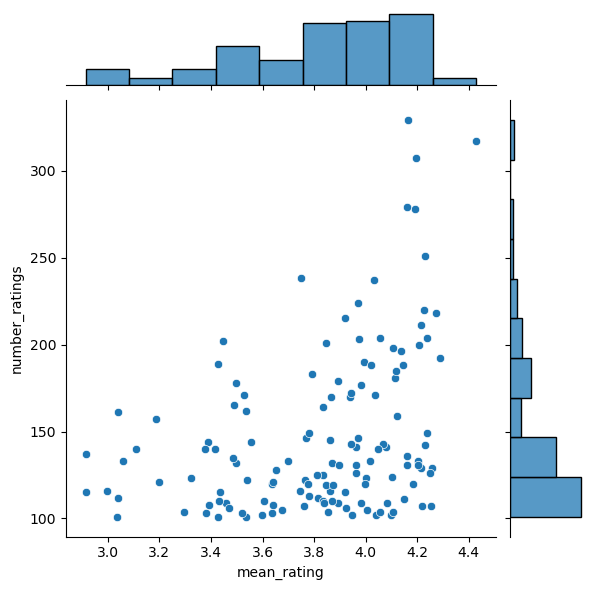

In [15]:
#visualize using joint plot
sns.jointplot(x='mean_rating', y='number_ratings', data=agg_ratings_GT_1000)

In [24]:
df_GT100 = pd.merge(df, agg_ratings_GT_1000[['title']], on='title', how='inner')
len(df_GT100)

19788

# Create user-prod matrix

In [25]:
user_product_mat = df_GT100.pivot_table(index='userId', columns='title', values='rating')
#normalize this matrix 
user_product_mat_norm = user_product_mat.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
user_product_mat_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.196429,NaN,NaN,0.303571,0.303571,NaN,-0.196429,...,NaN,NaN,NaN,-0.696429,NaN,0.303571,NaN,NaN,0.303571,0.303571
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.154412,NaN,NaN,NaN,0.404412,NaN,NaN,NaN,...,NaN,NaN,-0.345588,NaN,NaN,NaN,NaN,NaN,0.154412,NaN
5,NaN,-0.153846,0.179487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.487179,NaN,NaN,NaN,NaN,0.179487,NaN,NaN,NaN,NaN


# Find similarity 

- Pearson correlation

In [26]:
user_sim = user_product_mat_norm.T.corr()
user_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.0,-0.037987,...,9.157371e-02,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-5.833333e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-2.393249e-01,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,2.832792e-17,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582


In [28]:
#fill in Na with -1
user_product_mat_norm.fillna(-1, inplace=True) 
user_cos_sim = cosine_similarity(user_product_mat_norm.T)

user_cos_sim

array([[1.        , 0.8215988 , 0.74463602, ..., 0.84572368, 0.82458018,
        0.84565547],
       [0.8215988 , 1.        , 0.84932635, ..., 0.91042303, 0.84171237,
        0.83532536],
       [0.74463602, 0.84932635, 1.        , ..., 0.84026397, 0.80490721,
        0.79085972],
       ...,
       [0.84572368, 0.91042303, 0.84026397, ..., 1.        , 0.8544539 ,
        0.85685979],
       [0.82458018, 0.84171237, 0.80490721, ..., 0.8544539 , 1.        ,
        0.84227734],
       [0.84565547, 0.83532536, 0.79085972, ..., 0.85685979, 0.84227734,
        1.        ]])